In [20]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from seaborn import load_dataset

In [21]:
titanic = load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'age', 'sex']]
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
titanic.head()

,survived,pclass,age,sex
0,0,3,22.0,0
1,1,1,38.0,1
2,1,3,26.0,1
3,1,1,35.0,1
4,0,3,35.0,0


# Creation Train/Test Set

In [22]:
from sklearn.model_selection import  train_test_split

In [23]:
titanic = titanic.dropna(axis=0)
Features = titanic.drop('survived', axis=1)

Features

,pclass,age,sex
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0
...,...,...,...
885,3,39.0,1
886,2,27.0,0
887,1,19.0,1
889,1,26.0,0


In [24]:
targets = titanic.survived
targets

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [25]:
Features_train, Features_test, target_train, target_test = train_test_split(Features, targets, test_size=0.2, random_state=5)

In [26]:
print('Train set :', Features_train.shape)
print('Test set :' , Features_test.shape)

Train set : (571, 3)
Test set : (143, 3)


# Training

In [27]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier (n_neighbors=3)
model.fit(Features_train, target_train)
print('Train score :', model.score(Features_test, target_test))

Train score : 0.7552447552447552


In [28]:
from sklearn.model_selection import  GridSearchCV

params = { 'n_neighbors': np.arange(1,20), 'metric' : ['euclidean', 'manhattan'] }

grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(Features_train, target_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.7741723874904654
{'metric': 'manhattan', 'n_neighbors': 9}


In [30]:
model = grid.best_estimator_
model.score(Features_test, target_test)

0.7342657342657343

In [31]:
# Confusion Matrix

In [32]:
from sklearn.metrics import  confusion_matrix

In [33]:
confusion_matrix(target_test, model.predict(Features_test))

array([[72, 16],
       [22, 33]])

Le model a une 72 prédictions correctes sur la mort d'un passager, il a cependant dit que 16 survivait quand ce n'était pas le cas

Le model s'est trompé sur la survie d'un passager de 22 cas, il a eu une 33 prédiction corrects sur ce cas là

# Plus de Data?

In [34]:
from sklearn.model_selection import learning_curve

[ 45  91 136 182 228 273 319 364 410 456]


<function matplotlib.pyplot.legend(*args, **kwargs)>

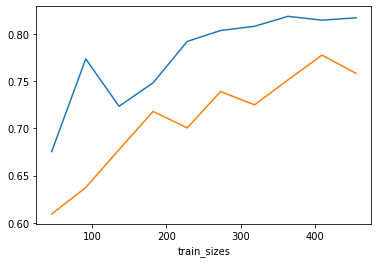

In [36]:
N, train_score, val_score = learning_curve(model, Features_train, target_train, train_sizes= np.linspace(0.1, 1.0, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend

 Seems like more data could be effective